In [6]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy.stats import shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('alzheimers_disease_data.csv', sep = ',')

In [8]:
df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

Проверка данных

In [9]:
duplicates = df.duplicated().sum()
print(f'Количество дублирующих строк: {duplicates}')

Количество дублирующих строк: 0


In [10]:
missing_values = df.isnull().sum()
print(f'Пустые значения в каждом столбце:\n{missing_values}')

Пустые значения в каждом столбце:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Diffi

In [11]:
sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

Изучение, описание распределения показателей


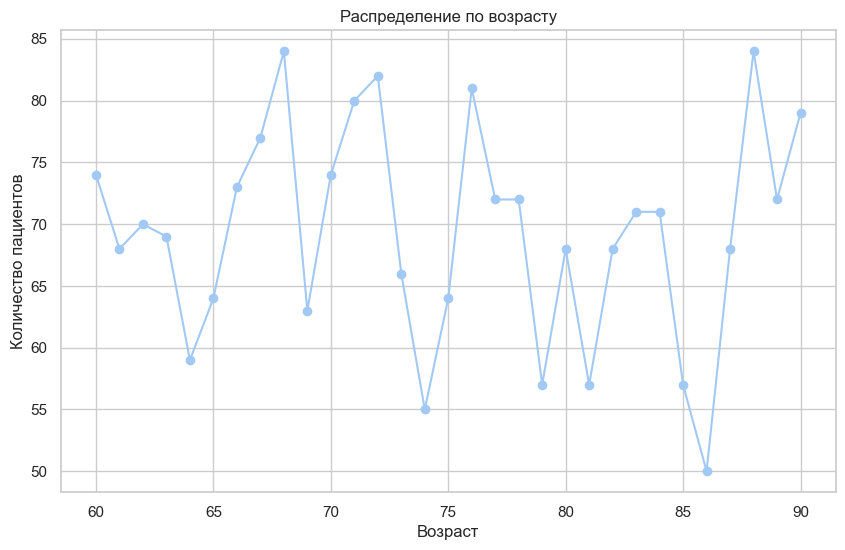

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['Age'].value_counts().sort_index(), marker='o')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')
plt.grid(True)
plt.show()

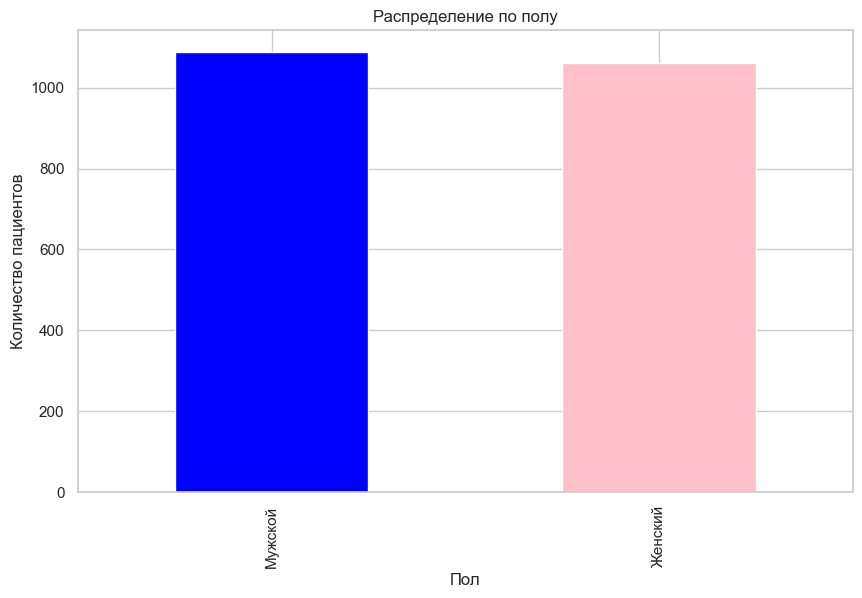

In [13]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1], labels=['Мужской', 'Женский'])
plt.show()

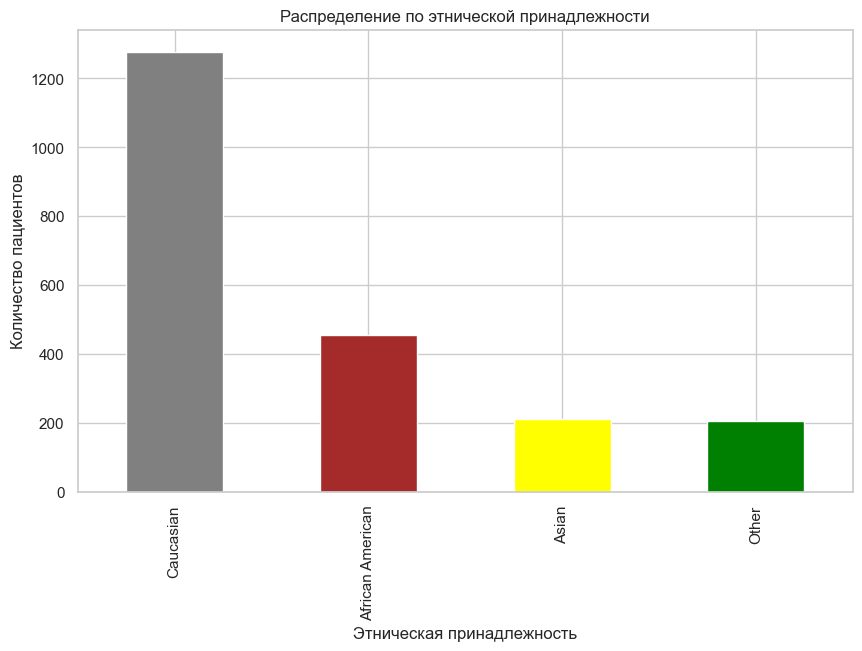

In [14]:
plt.figure(figsize=(10, 6))
df['Ethnicity'].value_counts().plot(kind='bar', color=['gray', 'brown', 'yellow', 'green'])
plt.title('Распределение по этнической принадлежности')
plt.xlabel('Этническая принадлежность')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Caucasian', 'African American', 'Asian', 'Other'])
plt.show()

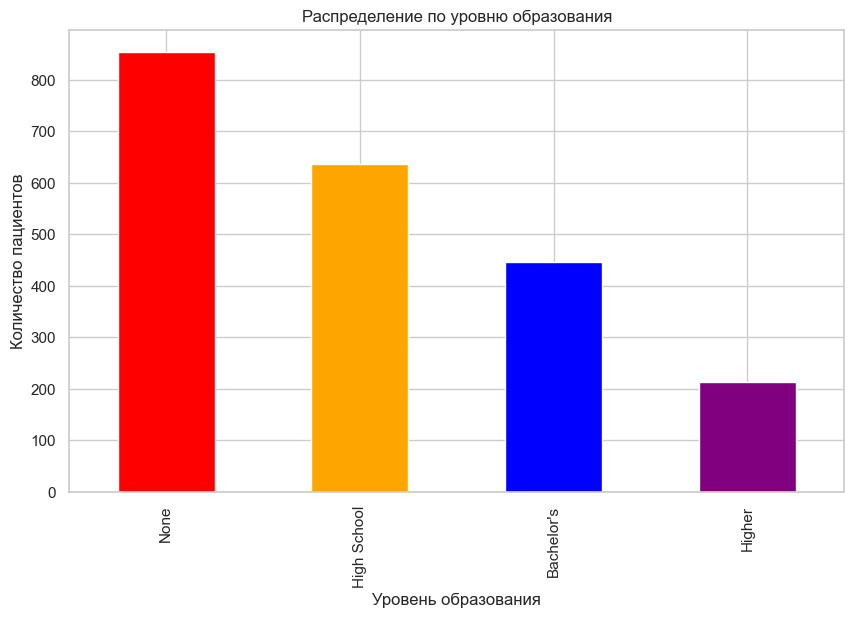

In [15]:
plt.figure(figsize=(10, 6))
df['EducationLevel'].value_counts().plot(kind='bar', color=['red', 'orange', 'blue', 'purple'])
plt.title('Распределение по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'High School', 'Bachelor\'s', 'Higher'])
plt.show()

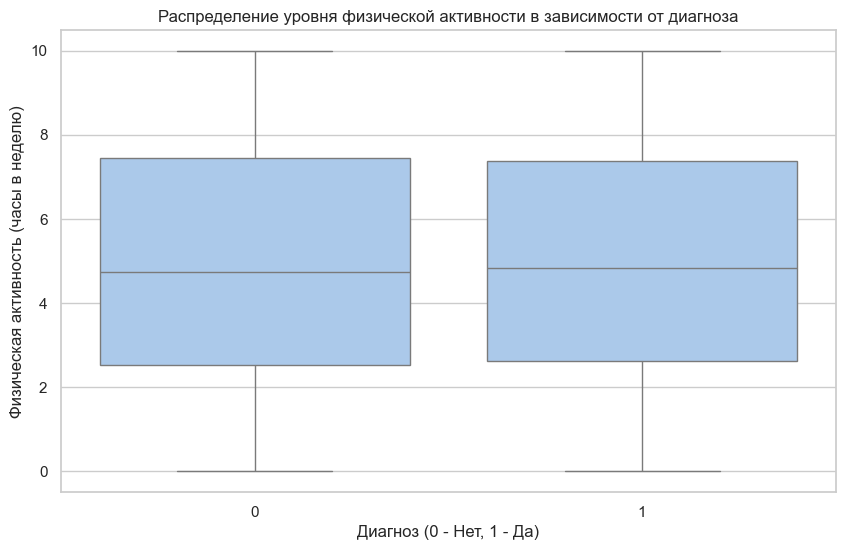

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title('Распределение уровня физической активности в зависимости от диагноза')
plt.xlabel('Диагноз (0 - Нет, 1 - Да)')
plt.ylabel('Физическая активность (часы в неделю)')
plt.show()

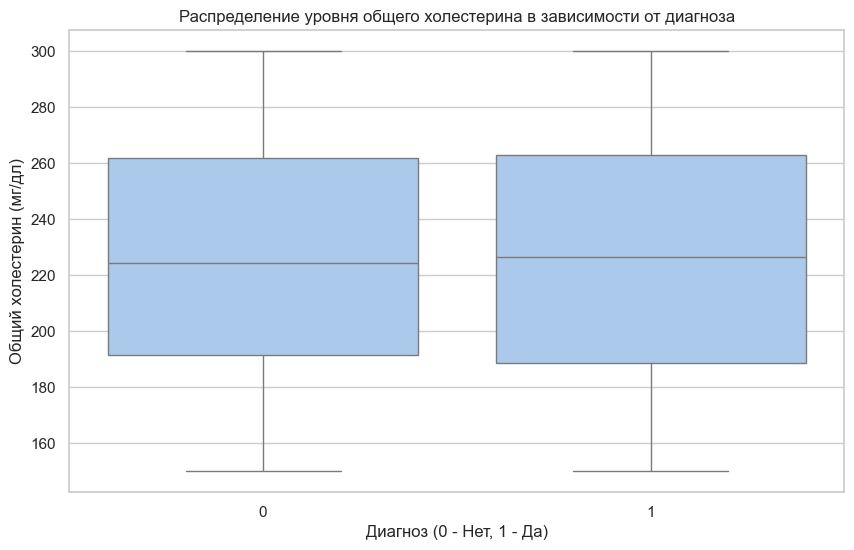

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='CholesterolTotal', data=df)
plt.title('Распределение уровня общего холестерина в зависимости от диагноза')
plt.xlabel('Диагноз (0 - Нет, 1 - Да)')
plt.ylabel('Общий холестерин (мг/дл)')
plt.show()

Изучение корреляции

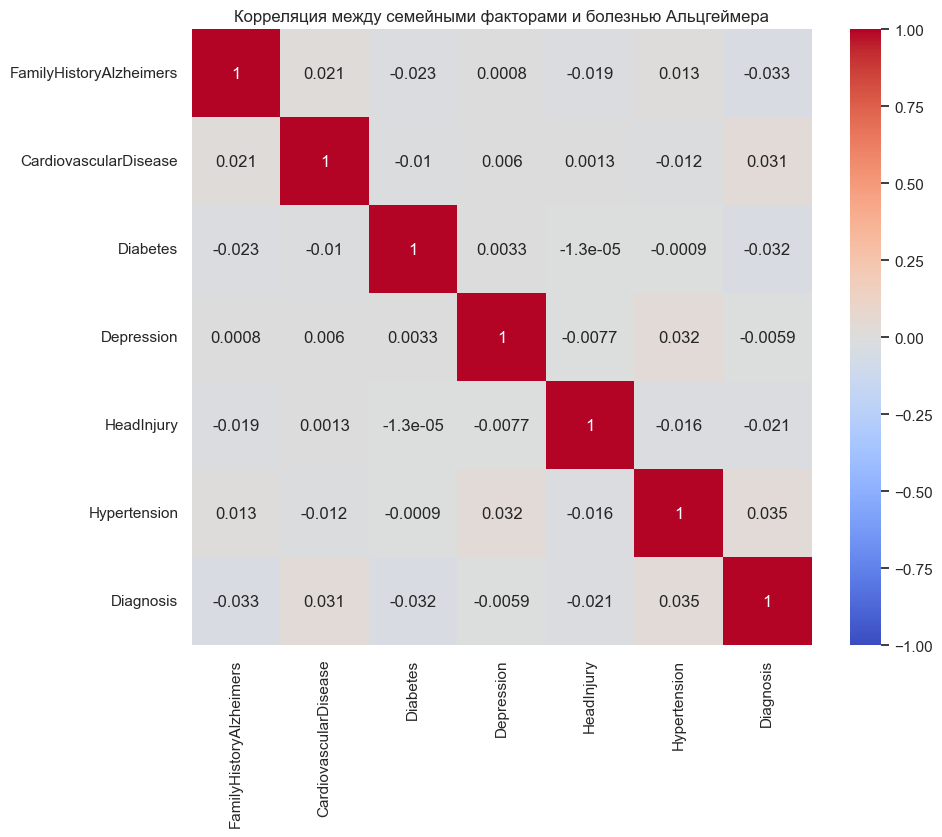

In [15]:
columns_of_interest = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'Diagnosis']

# Создание корреляционной матрицы
corr_matrix = df[columns_of_interest].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между семейными факторами и болезнью Альцгеймера')
plt.show()

In [16]:
import statsmodels.formula.api as smf
model = smf.ols('Diagnosis ~ FamilyHistoryAlzheimers + CardiovascularDisease + Diabetes + Depression + HeadInjury + Hypertension', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.774
Date:                Sat, 27 Jul 2024   Prob (F-statistic):              0.101
Time:                        19:46:47   Log-Likelihood:                -1458.2
No. Observations:                2149   AIC:                             2930.
Df Residuals:                    2142   BIC:                             2970.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

В целом, результаты показывают, что выбранные факторы не оказывают значимого влияния на диагноз болезни Альцгеймера в данной модели. 

Включение некоторых демографических факторов

C:\Users\markm\AppData\Local\Temp\ipykernel_13488\1966224382.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns=rename_dict, inplace=True)


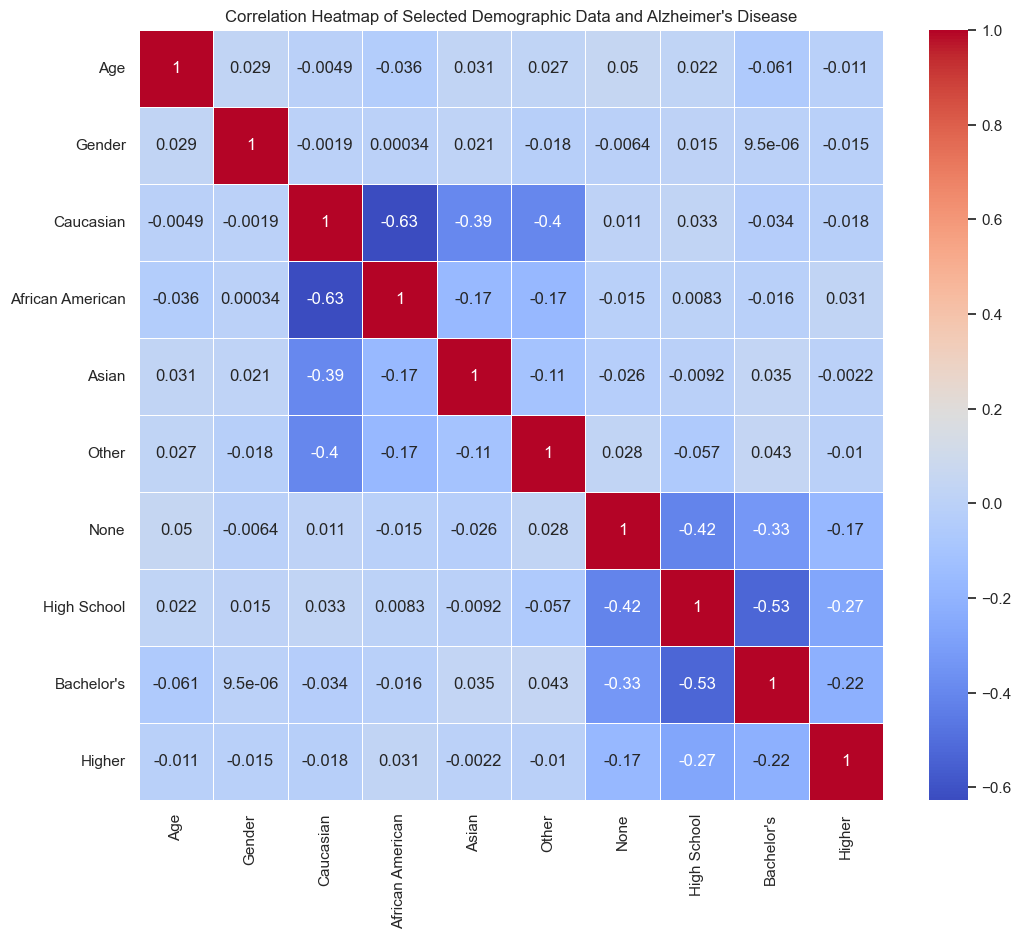

In [18]:
# Преобразование категориальных данных в бинарные переменные
df_dummies = pd.get_dummies(df, columns=['Ethnicity', 'EducationLevel'])

# Создание словаря для замены имен столбцов
rename_dict = {
    'Ethnicity_0': 'Caucasian',
    'Ethnicity_1': 'African American',
    'Ethnicity_2': 'Asian',
    'Ethnicity_3': 'Other',
    'EducationLevel_0': 'None',
    'EducationLevel_1': 'High School',
    'EducationLevel_2': 'Bachelor\'s',
    'EducationLevel_3': 'Higher'
}

# Выбор нужных столбцов
selected_columns = ['Age', 'Gender'] + [col for col in df_dummies.columns if 'Ethnicity_' in col or 'EducationLevel_' in col]
selected_df = df_dummies[selected_columns]
selected_df.rename(columns=rename_dict, inplace=True)

# Создание корреляционной матрицы
corr = selected_df.corr()

# Создание тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Demographic Data and Alzheimer\'s Disease')
plt.show()


In [19]:
model = smf.ols('Diagnosis ~ FamilyHistoryAlzheimers + CardiovascularDisease + Diabetes + Depression + HeadInjury + Hypertension', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.774
Date:                Sat, 27 Jul 2024   Prob (F-statistic):              0.101
Time:                        19:46:50   Log-Likelihood:                -1458.2
No. Observations:                2149   AIC:                             2930.
Df Residuals:                    2142   BIC:                             2970.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Ни одна из переменных не имеет значимой корреляции с диагнозом болезни Альцгеймера. 

Кластеризация

1 с учетом показателей когнитивных нарушений

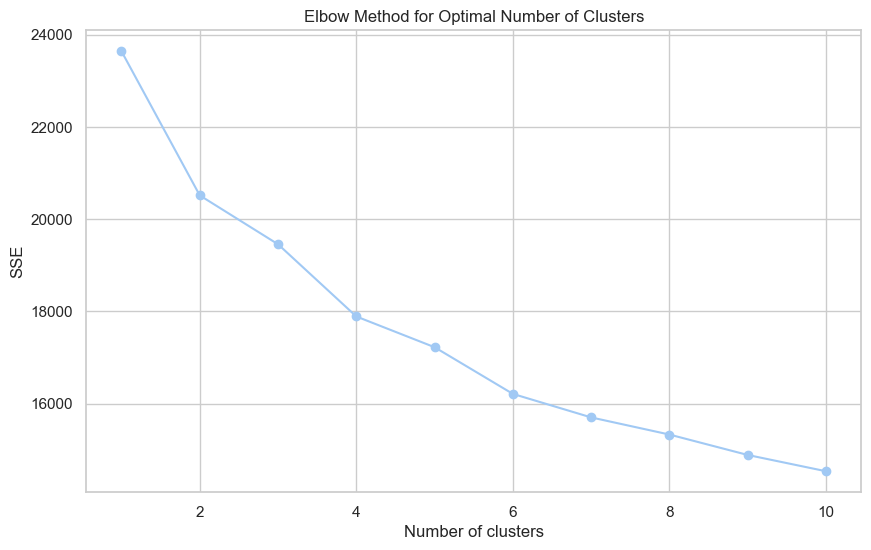

               Age        BMI  PhysicalActivity  DietQuality  SleepQuality  \
Cluster                                                                      
0        67.689227  27.810587          5.001683     5.244282      6.995587   
1        82.593520  27.090250          4.791258     4.681514      7.260911   
2        74.920912  28.020038          4.958488     5.033036      6.913953   

         Diagnosis       MMSE  FunctionalAssessment  MemoryComplaints  \
Cluster                                                                 
0         0.013812  17.191638              5.585553          0.132597   
1         0.008837  15.421389              6.186724          0.095729   
2         0.997319  11.784061              3.582188          0.383378   

         BehavioralProblems       ADL  
Cluster                                
0                  0.091160  6.229406  
1                  0.097202  5.199609  
2                  0.274799  3.576077  


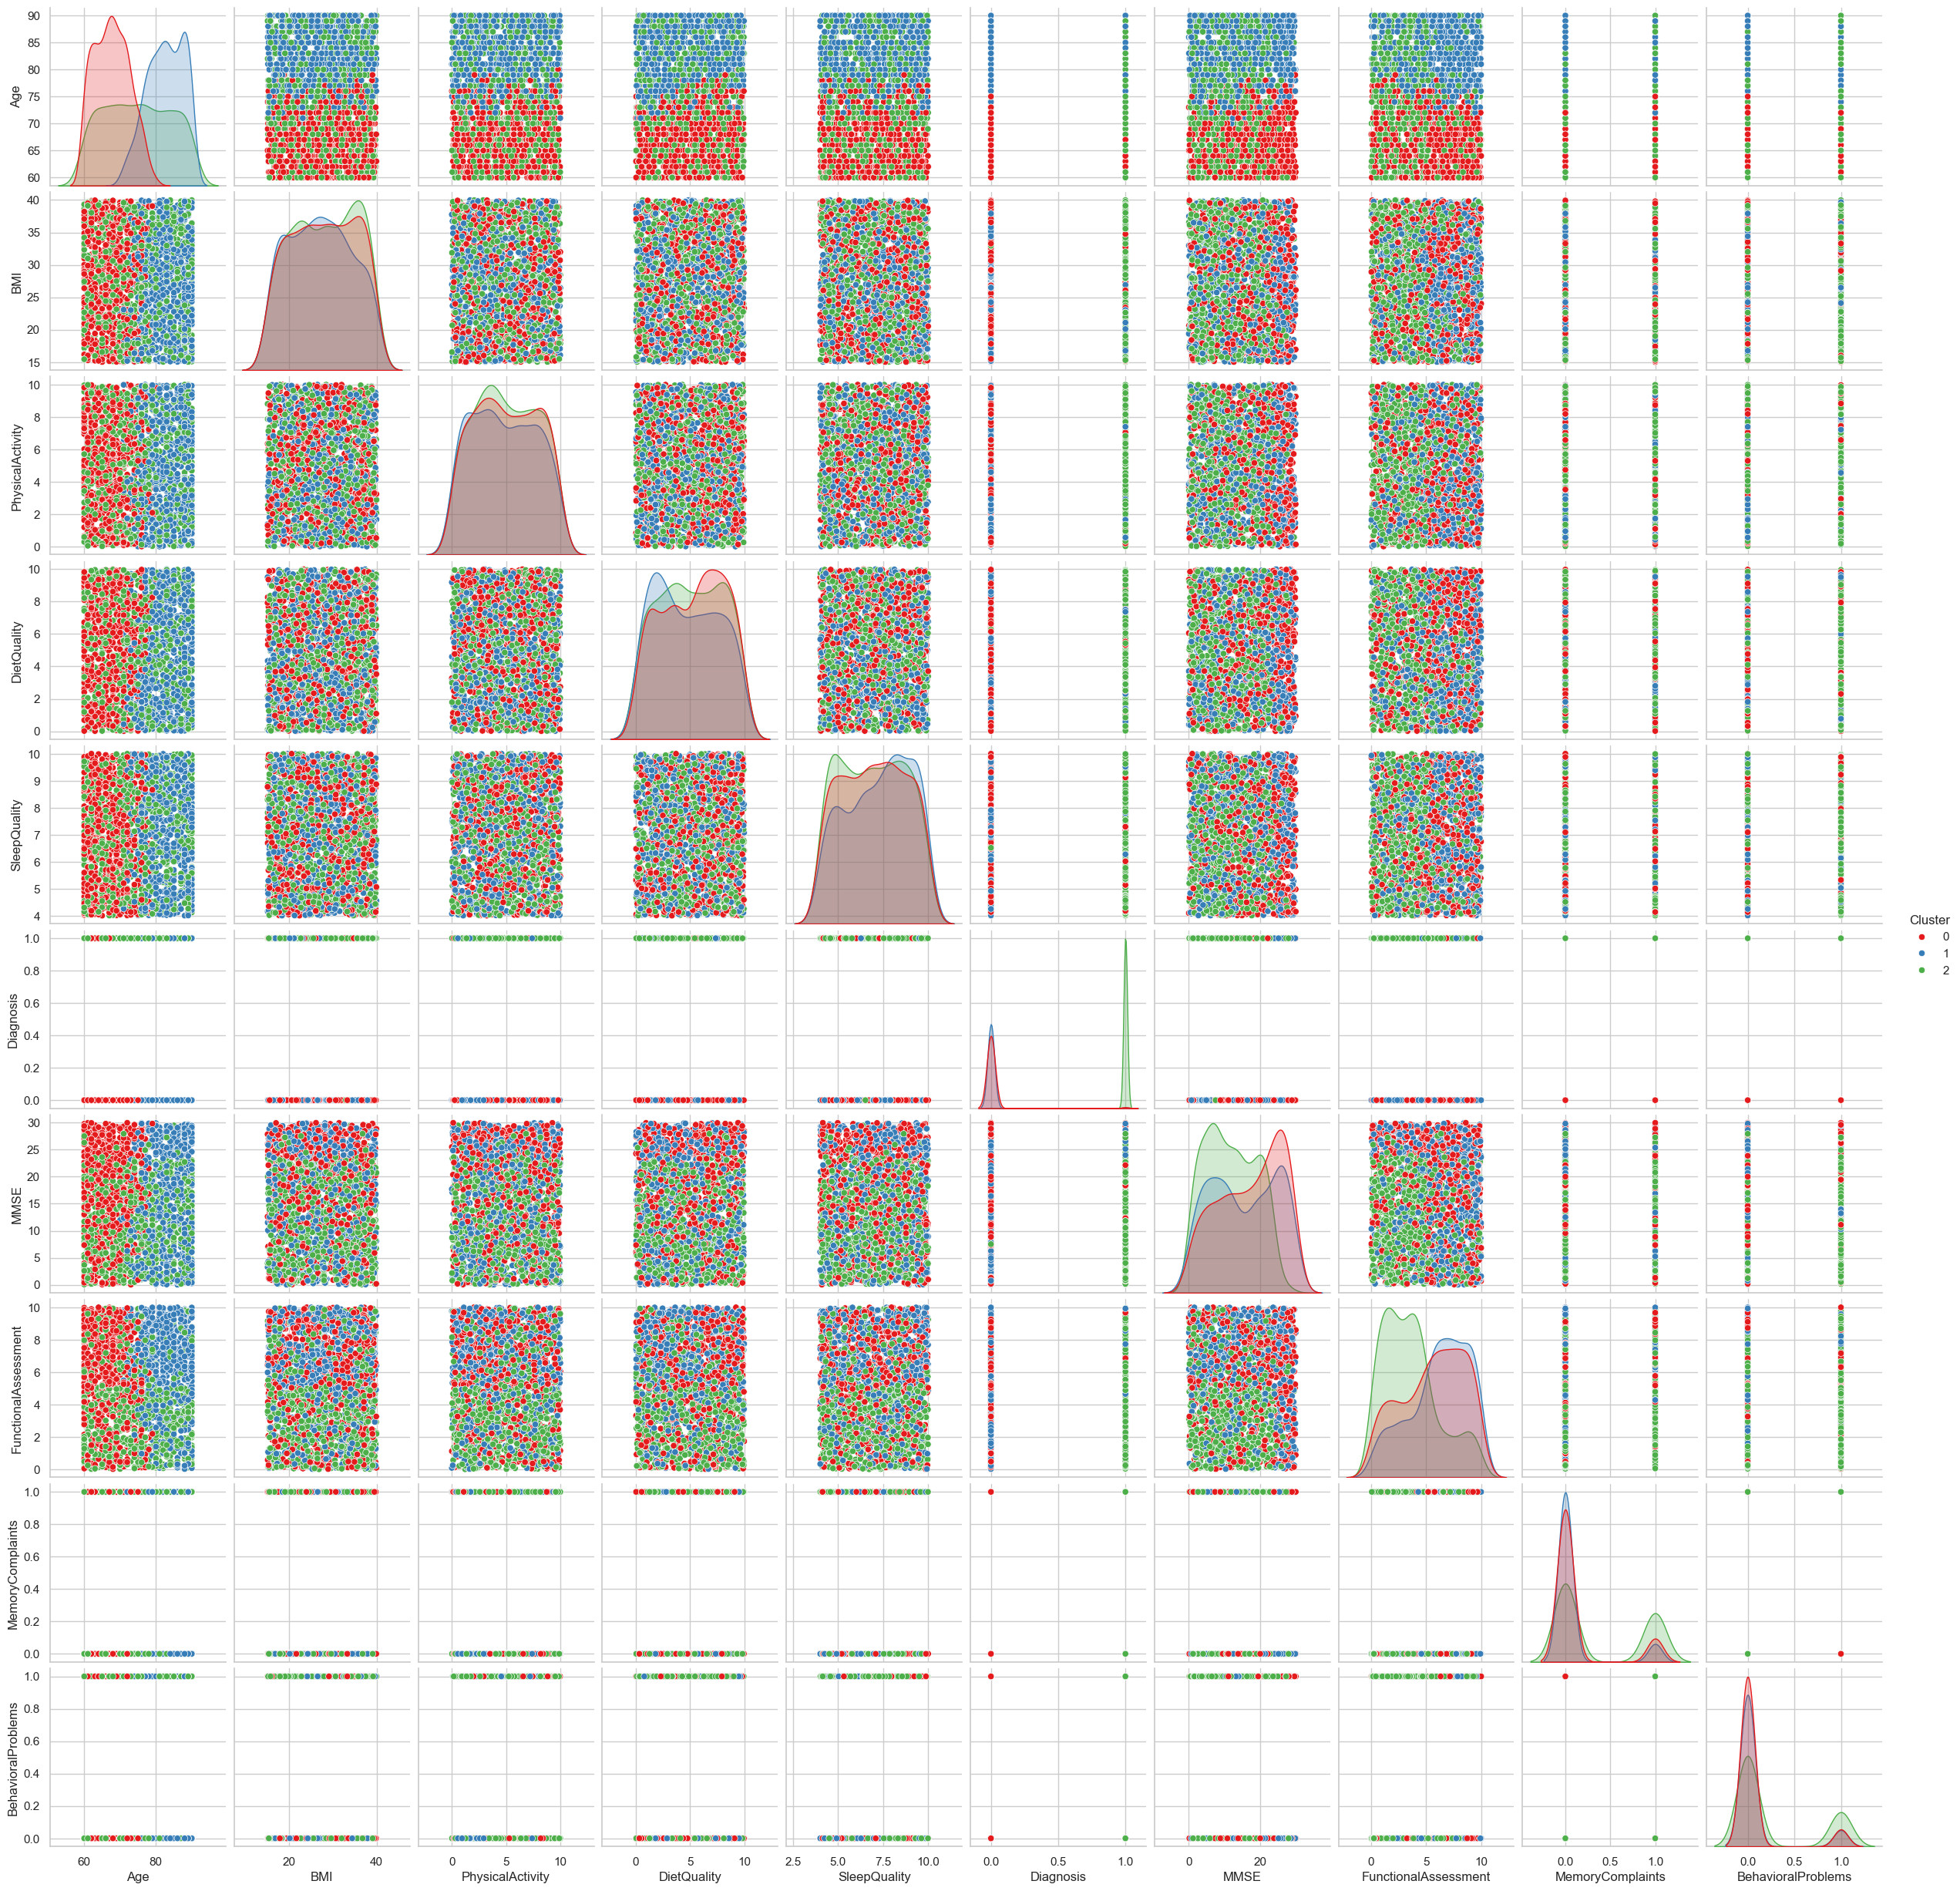

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Выбор переменных для кластеризации, включая клинические показатели
variables = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Diagnosis', 
             'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variables])

# Определение оптимального количества кластеров с помощью метода локтя
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Применение алгоритма K-средних с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Описание групп 
cluster_description = df.groupby('Cluster')[variables].mean()
print(cluster_description)

# Визуализация кластеров с учетом диагноза
sns.pairplot(df, hue='Cluster', vars=variables[:-1], diag_kind='kde', palette='Set1')
plt.show()


Кластер 0:
Средний возраст: 67.69 лет
Средний BMI: 27.81
Средняя физическая активность: 5.00 часов в неделю
Среднее качество диеты: 5.24
Среднее качество сна: 7.00
Диагноз: 0.0138 (практически нет диагноза болезни Альцгеймера)
MMSE: 17.19 (умеренное когнитивное нарушение)
Функциональная оценка: 5.59 (умеренное функциональное нарушение)
Жалобы на память: 0.13 (13% пациентов жалуются на проблемы с памятью)
Поведенческие проблемы: 0.09 (9% пациентов имеют поведенческие проблемы)
ADL: 6.23 (умеренное нарушение повседневной активности)

Кластер 1:
Средний возраст: 82.59 лет
Средний BMI: 27.09
Средняя физическая активность: 4.79 часов в неделю
Среднее качество диеты: 4.68
Среднее качество сна: 7.26
Диагноз: 0.0088 (практически нет диагноза болезни Альцгеймера)
MMSE: 15.42 (умеренное когнитивное нарушение)
Функциональная оценка: 6.19 (умеренное функциональное нарушение)
Жалобы на память: 0.10 (10% пациентов жалуются на проблемы с памятью)
Поведенческие проблемы: 0.10 (10% пациентов имеют поведенческие проблемы)
ADL: 5.20 (умеренное нарушение повседневной активности)

Кластер 2:
Средний возраст: 74.92 лет
Средний BMI: 28.02
Средняя физическая активность: 4.96 часов в неделю
Среднее качество диеты: 5.03
Среднее качество сна: 6.91
Диагноз: 0.9973 (почти все пациенты имеют диагноз болезни Альцгеймера)
MMSE: 11.78 (значительное когнитивное нарушение)
Функциональная оценка: 3.58 (значительное функциональное нарушение)
Жалобы на память: 0.38 (38% пациентов жалуются на проблемы с памятью)
Поведенческие проблемы: 0.27 (27% пациентов имеют поведенческие проблемы)
ADL: 3.58 (значительное нарушение повседневной активности)

Выводы:
Кластер 0: Пациенты среднего возраста с умеренными когнитивными и функциональными нарушениями, практически без диагноза болезни Альцгеймера.
Кластер 1: Самые пожилые пациенты с умеренными когнитивными и функциональными нарушениями, практически без диагноза болезни Альцгеймера.
Кластер 2: Пациенты старшего возраста с значительными когнитивными и функциональными нарушениями, почти все имеют диагноз болезни Альцгеймера.

2 без учета показателей когнитивных нарушений

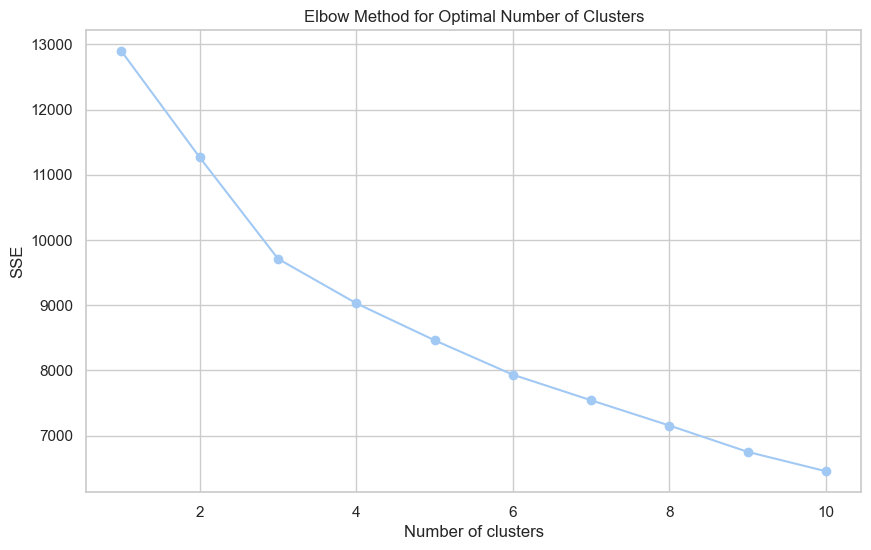

               Age        BMI  PhysicalActivity  DietQuality  SleepQuality  \
Cluster                                                                      
0        67.560113  28.282026          4.983714     5.095696      6.854870   
1        82.601173  26.720045          4.828779     4.849552      7.404689   
2        74.842105  27.912670          4.943160     5.026581      6.916292   

         Diagnosis  
Cluster             
0              0.0  
1              0.0  
2              1.0  


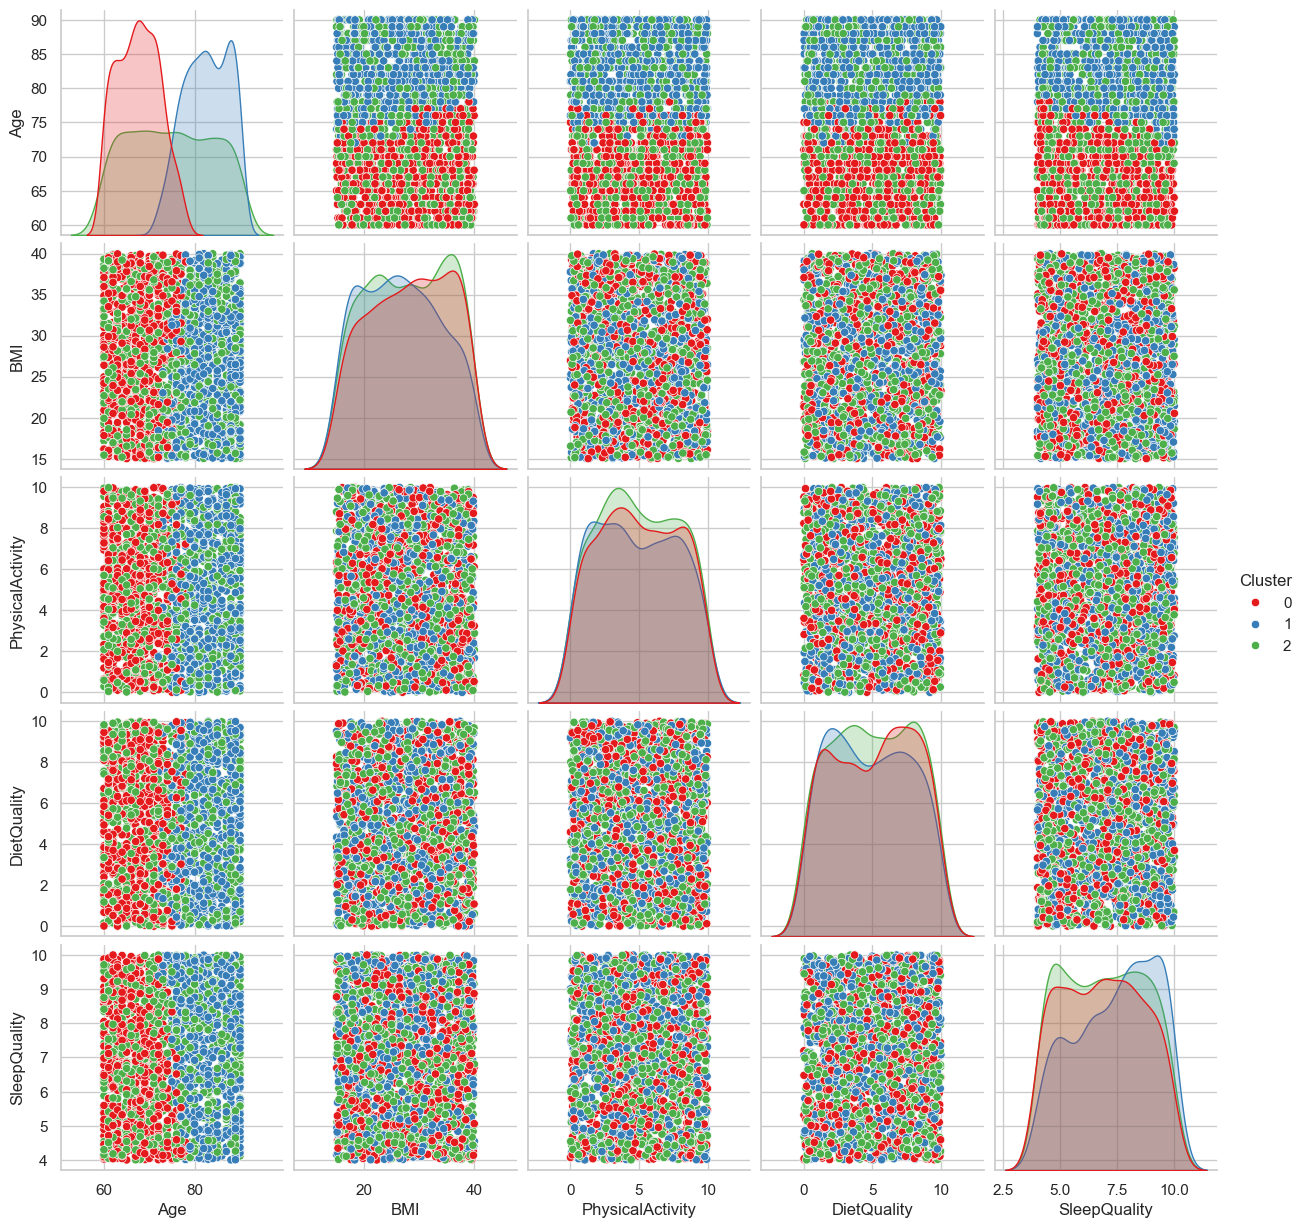

In [21]:
variables = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Diagnosis']

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variables])

# Определение оптимального количества кластеров с помощью метода локтя
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Применение алгоритма K-средних с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Описание групп пациентов
cluster_description = df.groupby('Cluster')[variables].mean()
print(cluster_description)

# Визуализация кластеров с учетом диагноза
sns.pairplot(df, hue='Cluster', vars=variables[:-1], diag_kind='kde', palette='Set1')
plt.show()



Кластер 0:
Средний возраст: 67.56 лет
Средний BMI: 28.28
Средняя физическая активность: 4.98 часов в неделю
Среднее качество диеты: 5.10
Среднее качество сна: 6.85
Диагноз: 0.0 (нет диагноза болезни Альцгеймера)
Эта группа включает пациентов среднего возраста с умеренным уровнем физической активности и качеством диеты. У них нет диагноза болезни Альцгеймера.

Кластер 1:
Средний возраст: 82.60 лет
Средний BMI: 26.72
Средняя физическая активность: 4.83 часов в неделю
Среднее качество диеты: 4.85
Среднее качество сна: 7.40
Диагноз: 0.0 (нет диагноза болезни Альцгеймера)
Эта группа включает самых пожилых пациентов с умеренным уровнем физической активности и качеством диеты. У них также нет диагноза болезни Альцгеймера.

Кластер 2:
Средний возраст: 74.84 лет
Средний BMI: 27.91
Средняя физическая активность: 4.94 часов в неделю
Среднее качество диеты: 5.03
Среднее качество сна: 6.92
Диагноз: 1.0 (есть диагноз болезни Альцгеймера)
Эта группа включает пациентов старшего возраста с умеренным уровнем физической активности и качеством диеты. У них есть диагноз болезни Альцгеймера.

Выводы:
Кластер 0: Пациенты среднего возраста без диагноза болезни Альцгеймера.
Кластер 1: Самые пожилые пациенты без диагноза болезни Альцгеймера.
Кластер 2: Пациенты старшего возраста с диагнозом болезни Альцгеймера.

Построение логистической  модели - использование всех признаков без отбора


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Целевая переменная (наличие БА)
target = 'Diagnosis'

# Переменные-факторы
features = ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 
            'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 
            'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 
            'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 
            'CholesterolTriglycerides']

# Подготовка данных
X = df[features]
y = df[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели логистической регрессии
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.6217054263565891
Confusion Matrix:
[[401   0]
 [244   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       401
           1       0.00      0.00      0.00       244

    accuracy                           0.62       645
   macro avg       0.31      0.50      0.38       645
weighted avg       0.39      0.62      0.48       645



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [ ]:
Accuracy (Точность)
Точность модели составляет 0.62 или 62.5%. Это означает, что модель правильно предсказала диагноз в 62.5% случаев. Однако, точность не всегда является лучшей метрикой для оценки модели, особенно если классы несбалансированы.

Confusion Matrix (Матрица ошибок)
Матрица ошибок показывает, как модель классифицировала данные:

[[401   0]
 [242   2]]

401: Количество истинно отрицательных (True Negative, TN) случаев, когда модель правильно предсказала отсутствие болезни (0).
0: Количество ложно положительных (False Positive, FP) случаев, когда модель ошибочно предсказала наличие болезни (1).
242: Количество ложно отрицательных (False Negative, FN) случаев, когда модель ошибочно предсказала отсутствие болезни (0).
2: Количество истинно положительных (True Positive, TP) случаев, когда модель правильно предсказала наличие болезни (1).

Classification Report (Отчет по классификации)
Отчет по классификации включает несколько метрик:

Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
Для класса 0: 0.62
Для класса 1: 1.00
Recall (Полнота): Доля правильных положительных предсказаний среди всех истинных положительных случаев.
Для класса 0: 1.00
Для класса 1: 0.01
F1-score: Среднее гармоническое между точностью и полнотой.
Для класса 0: 0.77
Для класса 1: 0.02
Support: Количество истинных случаев в каждом классе.
Для класса 0: 401
Для класса 1: 244
Интерпретация
Модель хорошо предсказывает отсутствие болезни (класс 0), но почти не предсказывает наличие болезни (класс 1). Это видно из высокой полноты для класса 0 (1.00) и очень низкой полноты для класса 1 (0.01).
Высокая точность для класса 1 (1.00) означает, что когда модель предсказывает наличие болезни, она почти всегда права, но таких предсказаний очень мало.
Низкий F1-score для класса 1 (0.02) указывает на то, что модель плохо справляется с предсказанием наличия болезни.